In [20]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime
from google_news import fetch_news

In [21]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [22]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-29 10:47'

In [23]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})


In [24]:
country_tlds = pd.read_csv('https://raw.githubusercontent.com/alext234/ccTLD/master/data/cc_tld.csv')

In [36]:
titles = set()
for _, tld in country_tlds.iterrows():
    gnews_url = 'https://news.google.com'+tld[0]
    try:
        titles.update(fetch_news(gnews_url))
        print(f'fetched {gnews_url}')
    except Exception as e:
        # probably some country TLD do not have a google news domain
        pass


fetched https://news.google.com.au
fetched https://news.google.com.cn


In [37]:
assert len(titles)>0

In [38]:
df_latest = pd.DataFrame({'datetime':now, 'headline': list(titles)})

In [39]:
df_latest.head(10)

,datetime,headline
0,2020-02-29 10:47,World prepares for coronavirus pandemic - Coro...
1,2020-02-29 10:47,贝因美2019年再度亏损，4年重回奶粉行业三甲有点难 - 新京报
2,2020-02-29 10:47,化身理发师、追电视剧……疫情期间运动员们在干啥？ - 新浪网
3,2020-02-29 10:47,Coronavirus impacts 49 nations and stock marke...
4,2020-02-29 10:47,Firefighters steal show at Mardi Gras from mus...
5,2020-02-29 10:47,Arrest after man allegedly stabbed woman with ...
6,2020-02-29 10:47,元首外交，凝聚信心与力量（和音） - 南方网
7,2020-02-29 10:47,波兰斯基获颁法国电影大奖 反性暴力者批判 - RFI - 法国国际广播电台
8,2020-02-29 10:47,Health ministers are coming together to review...
9,2020-02-29 10:47,李冰冰生日发文感谢祝福：愿春暖花开国泰民安-手机闽南网 - 闽南网


In [40]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [41]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [42]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [57]:
def is_reference_corona(s):
    return (
        ('coronavirus' in s)
        or ('covid-19' in s)
        or ('corona' in s)
        or ('ncov' in s)
    )
        
    
# is_virus is 1 if there is reference to coronavirus
    
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if is_reference_corona(v.lower()) else 0)
)

In [58]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [59]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
datetime_idx,
2020-02-29 10:47:00,Australia stops travel to coronavirus affected...
2020-02-29 10:47:00,WHO raises coronavirus risk to 'very high' - S...
2020-02-29 10:47:00,Coronavirus news: South Korea reports 'critica...
2020-02-29 10:47:00,Trump calls coronavirus criticism Democrats' '...
2020-02-29 10:47:00,GDC 2020 is officially canceled due to coronav...


In [60]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [61]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-29 10:47:00,2020-02-29 10:47,Sportwatch: India qualify for T20 World Cup se...,0,267
2020-02-29 10:47:00,2020-02-29 10:47,华谊兄弟2019年亏损近40亿，已到存亡时刻？ - 京报网,0,267
2020-02-29 10:47:00,2020-02-29 10:47,土耳其驻扎在叙利亚不是为了领土或石油 - TRT 中文网站,0,267


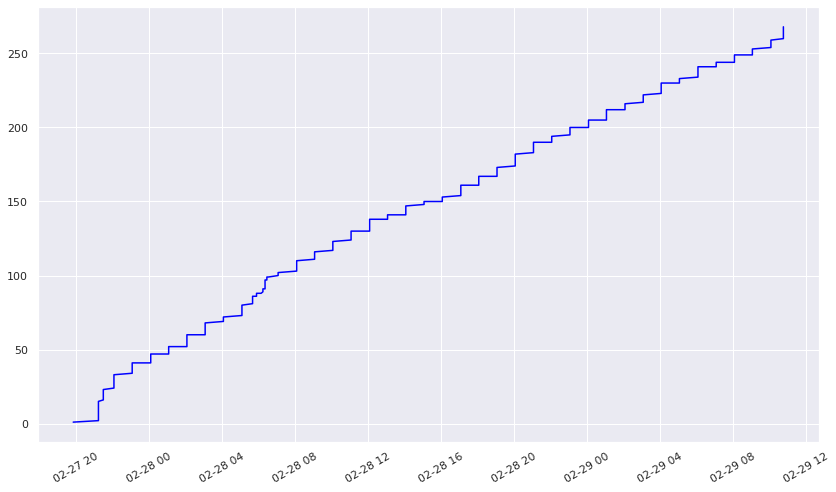

In [62]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
